# Visualizing Results of IMINFECTOR on different attributes

In [1]:
# @title Installing GCS Fuse to mount directly to Google Cloud Storage
# If false, allows using this publicly avaiable container storage bucket
# https://console.cloud.google.com/storage/browser/fair-influence-maximization-mounted?hl=en&project=d4w3-369005&pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false
USE_GDRIVE = False
if USE_GDRIVE:
  !pip install google-colab
  from google.colab import drive
  # allow perms
  drive.mount('/gdrive')
else:
  # Justin's version (justinryanwong@berkeley.edu)
  from google.colab import auth
  auth.authenticate_user()
  import os

  # Install gcsfuse: https://cloud.google.com/storage/docs/gcsfuse-install
  # !uname -a # uname gets the system environment info.
  # !export GCSFUSE_REPO=gcsfuse-`lsb_release -c -s` in colab enterprise
  !lsb_release -c -s
  os.environ["GCSFUSE_REPO"] = "gcsfuse-jammy" # jammy is the output of "!lsb_release -c -s"
  !echo "deb https://packages.cloud.google.com/apt $GCSFUSE_REPO main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
  !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
  !apt-get update -y
  !apt-get install -y fuse gcsfuse

  # verify gcsfuse is installed properly.
  !gcsfuse --version

  # Mounting GCS
  import os
  # Since this can't directly connect to gdrive, create this as mount path. This makes it compatible with Michael's gdrive
  os.makedirs('/gdrive/MyDrive/FairInfluenceMaximization', exist_ok=True)
  !gcsfuse --implicit-dirs fair-influence-maximization-mounted /gdrive/MyDrive/FairInfluenceMaximization



jammy
deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2659  100  2659    0     0   5520      0 --:--:-- --:--:-- --:--:--  5516
OK
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://packages.cloud.google.com/apt gcsfuse-jammy InRelease [1,225 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu 

In [2]:
pip install pandas

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_dataframe_data(dataframe, title_prefix):
  """
  Plots FScore and DNI vs Influencer set size from a DataFrame.

  Args:
      dataframe: A pandas DataFrame containing columns for
                 "Influencer set size", "FScore", and "DNI".
  """
  plt.figure(figsize=(16, 24))  # Adjust figure size as needed

  # Left plot (FScore)
  plt.subplot(1, 2, 1)
  plt.plot(dataframe["Influencer set size"], dataframe["FScore"], marker='o', label='FScore')
  plt.xlabel("K (Influencer set size)")
  plt.ylabel("FScore")
  plt.title(f"{title_prefix} - FScore vs Influencer Set Size")
  plt.grid(True)

  # Right plot (DNI)
  plt.subplot(1, 2, 2)
  plt.plot(dataframe["Influencer set size"], dataframe["DNI"], marker='o', label='DNI')
  plt.xlabel("K (Influencer set size)")
  plt.ylabel("DNI")
  plt.title(f"{title_prefix} - DNI vs Influencer Set Size")
  plt.grid(True)

  # Add a legend to the overall figure
  plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
  plt.tight_layout()
  plt.show()

def plot_comparable_subplots(
                            title_to_avg_cascade_size_seeds_labels_to_df,
                            title_to_kcores_seeds_labels_to_df,
                            title_to_participated_seeds_labels_to_df,
                            title_to_weibo_final_seeds_labels_to_df,
                            x_label="K (Influencer set size)", title="Evaluated Seeds"):
  """
  Plots four subplots in a 4x2 grid layout.

  Args:
      data1: Data for the first plot.
      label1: Label for the first plot.
      data2: Data for the second plot.
      label2: Label for the second plot.
      data3: Data for the third plot.
      label3: Label for the third plot.
      data4: Data for the fourth plot.
      label4: Label for the fourth plot.
      x_label: Label for the x-axis (default: "X").
      y_label: Label for the y-axis (default: "Y").
      title: Title for the overall plot (default: "Four Plots").
  """
  # Create a 2x2 grid of subplots
  fig, axes = plt.subplots(4, 2, figsize=(18, 14))  # Adjust figure size as needed

  # Plot data on each subplot
  for partial_title1, df1 in title_to_avg_cascade_size_seeds_labels_to_df.items():
    print(df1.columns)
    axes[0, 0].plot(df1["Influencer set size"], df1["FScore"], label=f"{partial_title1} FScore")
    axes[0, 0].set_xlabel(x_label)
    axes[0, 0].set_ylabel("FScore")
    axes[0, 0].set_title(f"{x_label} vs FScore")
    axes[0, 0].legend()

    axes[0, 1].plot(df1["Influencer set size"], df1["DNI"], label=f"{partial_title1} DNI")
    axes[0, 1].set_xlabel(x_label)
    axes[0, 1].set_ylabel("DNI")
    axes[0, 1].set_title(f"{x_label} vs DNI")
    axes[0, 1].legend()

  for partial_title2, df2 in title_to_kcores_seeds_labels_to_df.items():
    axes[1, 0].plot(df2["Influencer set size"], df2["FScore"], label=f"{partial_title2} FScore")
    axes[1, 0].set_xlabel(x_label)
    axes[1, 0].set_ylabel("FScore")
    axes[1, 0].set_title(f"{x_label} vs FScore")
    axes[1, 0].legend()

    axes[1, 1].plot(df2["Influencer set size"], df2["DNI"], label=f"{partial_title2} DNI")
    axes[1, 1].set_xlabel(x_label)
    axes[1, 1].set_ylabel("DNI")
    axes[1, 1].set_title(f"{x_label} vs DNI")
    axes[1, 1].legend()

  for partial_title3, df3 in title_to_participated_seeds_labels_to_df.items():
    axes[2, 0].plot(df3["Influencer set size"], df3["FScore"], label=f"{partial_title3} FScore")
    axes[2, 0].set_xlabel(x_label)
    axes[2, 0].set_ylabel("FScore")
    axes[2, 0].set_title(f"{x_label} vs FScore")
    axes[2, 0].legend()

    axes[2, 1].plot(df3["Influencer set size"], df3["DNI"], label=f"{partial_title3} DNI")
    axes[2, 1].set_xlabel(x_label)
    axes[2, 1].set_ylabel("DNI")
    axes[2, 1].set_title(f"{x_label} vs DNI")
    axes[2, 1].legend()

  for partial_title4, df4 in title_to_weibo_final_seeds_labels_to_df.items():
    axes[3, 0].plot(df4["Influencer set size"], df4["FScore"], label=f"{partial_title4} FScore")
    axes[3, 0].set_xlabel(x_label)
    axes[3, 0].set_ylabel("FScore")
    axes[3, 0].set_title(f"{x_label} vs FScore")
    axes[3, 0].legend()

    axes[3, 1].plot(df4["Influencer set size"], df4["DNI"], label=f"{partial_title4} DNI")
    axes[3, 1].set_xlabel(x_label)
    axes[3, 1].set_ylabel("DNI")
    axes[3, 1].set_title(f"{x_label} vs DNI")
    axes[3, 1].legend()


  # Set overall title (optional)
  fig.suptitle(title)

  # Adjust layout (optional)
  plt.tight_layout()

  plt.show()

In [54]:
BASE_PATHS = {
              # "Age 10 epochs": "/gdrive/MyDrive/FairInfluenceMaximization/data/Data/Weibo/Output_Full-attempt_2024-03-12/Spreading/",
              # "Age 1 epoch": "/gdrive/MyDrive/FairInfluenceMaximization/data/Data/Weibo/Output_Full-attempt_2024-03-12_epoch1/Spreading/",
              "Synthetic Age 1 epoch": "/gdrive/MyDrive/FairInfluenceMaximization/data/Data/Weibo/Output_Full-attempt_2024-03-30_synethic_age/Spreading/",
              "Syntehtic Political Position 1 epoch": "/gdrive/MyDrive/FairInfluenceMaximization/data/Data/Weibo/Output_Full-attempt_2024-03-30_synethic_political_position//Spreading/"
}

files = {
    "Average Cascade Size Seeds": "avg_cascade_size_seeds.txt",
    "K Cores Seeds": "kcores_seeds.txt",
    "Participated Seeds": "participated_seeds.txt",
    "Weibo Final Seeds": "weibo_final_seeds.txt"
}

data_to_plot = []
for file_key, file in files.items():
  combined = {}
  for partial_title, BASE_PATH in BASE_PATHS.items():
    file_df = pd.read_csv(BASE_PATH + file)
    combined[partial_title] = file_df
  data_to_plot.append(combined)


In [55]:
data_to_plot

[{'Synthetic Age 1 epoch':     Influencer set size     DNI    FScore
  0                    50    7287  0.990584
  1                   100   16654  0.984674
  2                   150   34445  0.986906
  3                   200   34760  0.987850
  4                   250   37502  0.987881
  5                   300   65348  0.992690
  6                   350   97537  0.996240
  7                   400  103118  0.996907
  8                   450  109381  0.996686
  9                   500  129522  0.996211
  10                  550  149219  0.995797
  11                  600  162821  0.996425
  12                  650  176231  0.996804
  13                  700  184094  0.996590
  14                  750  202141  0.997361
  15                  800  204692  0.997344
  16                  850  209824  0.997332
  17                  900  231501  0.998387
  18                  950  234728  0.998229
  19                 1000  242645  0.998858
  20                 1050  242647  0.998859,
  'Syn

Index(['Influencer set size', 'DNI', 'FScore'], dtype='object')
Index(['Influencer set size', 'DNI', 'FScore'], dtype='object')


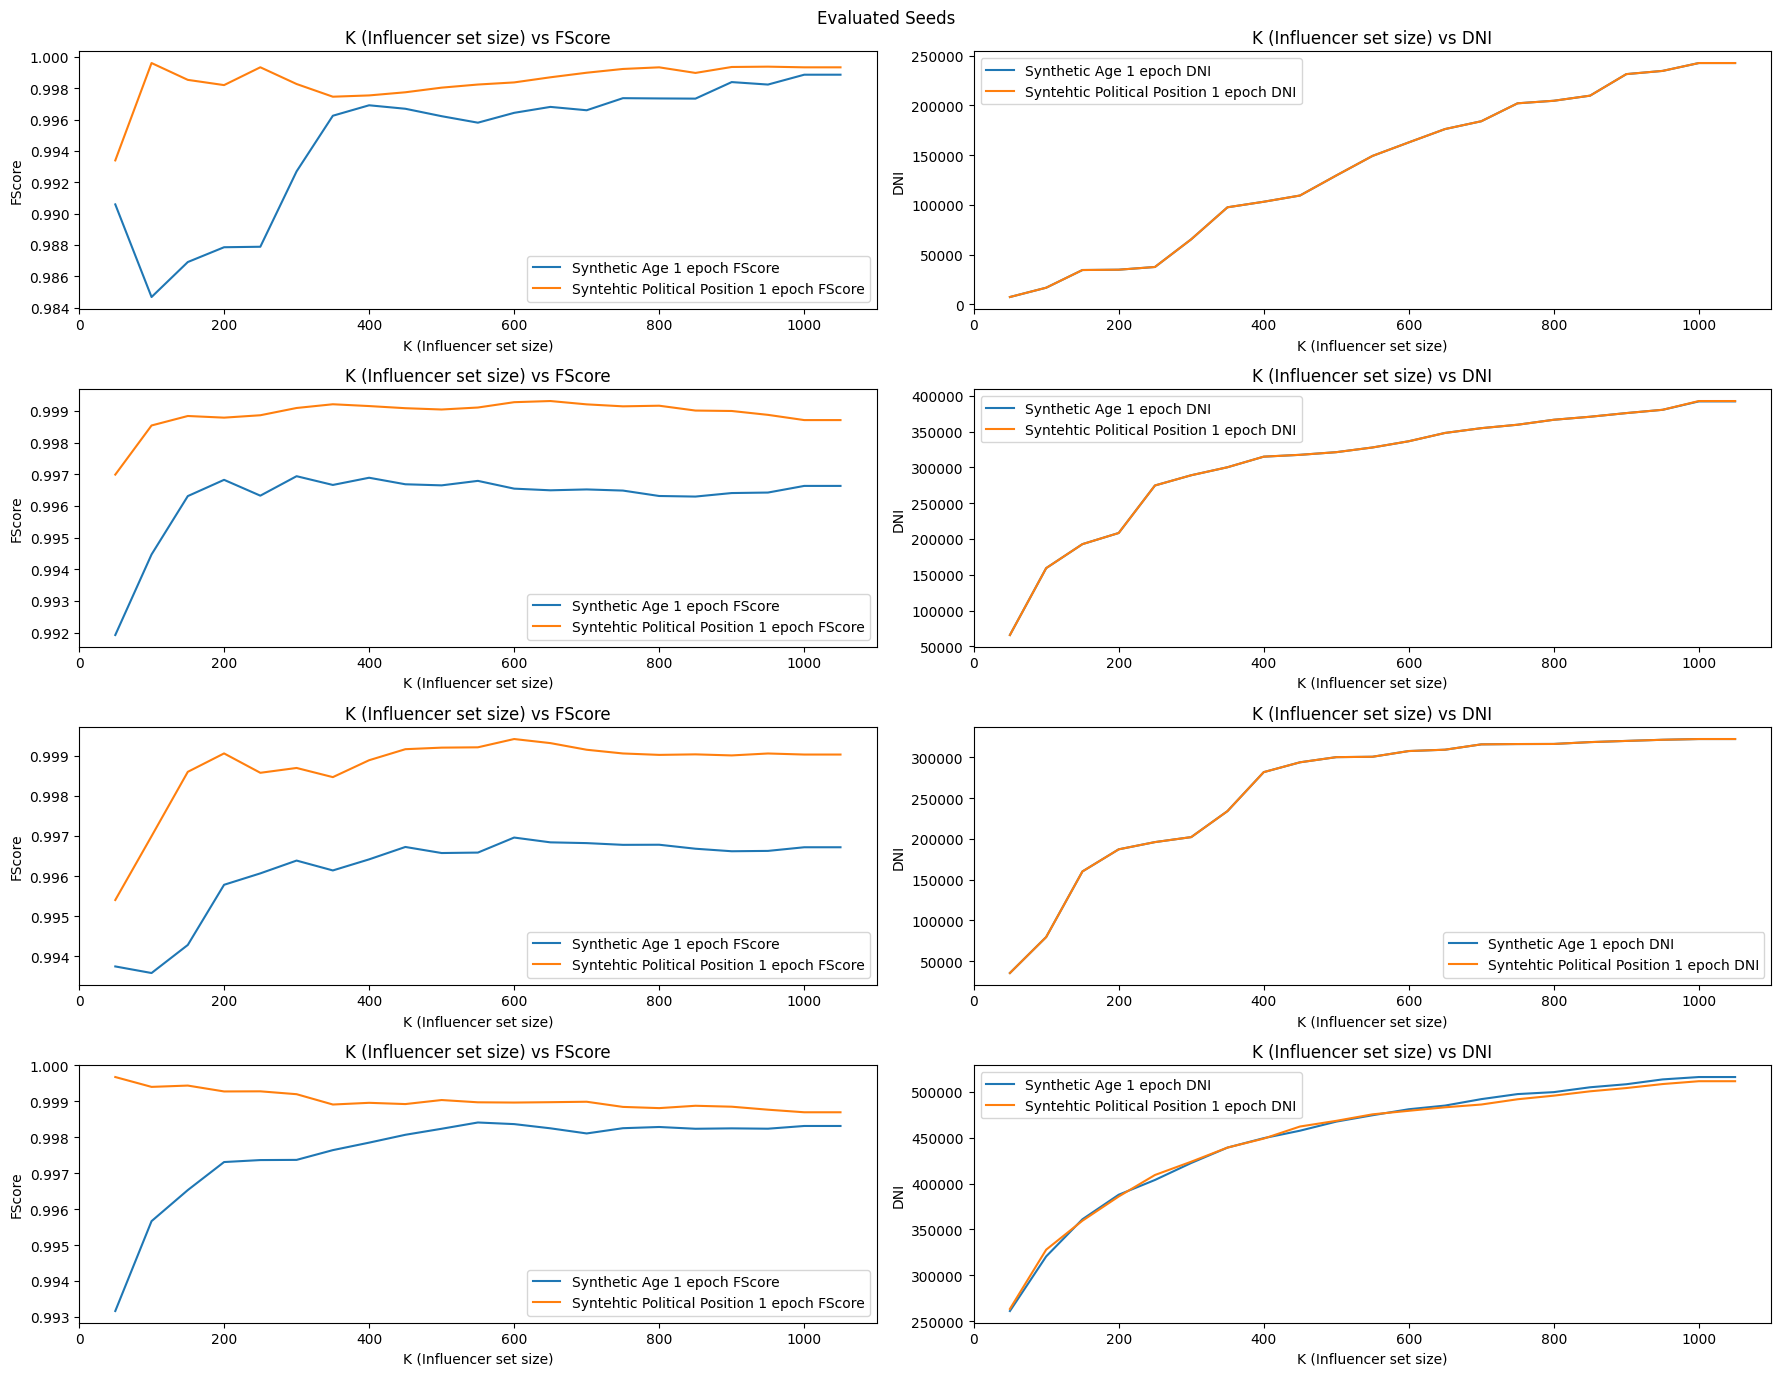

In [68]:
plot_comparable_subplots(title_to_avg_cascade_size_seeds_labels_to_df=data_to_plot[0],
                            title_to_kcores_seeds_labels_to_df=data_to_plot[1],
                            title_to_participated_seeds_labels_to_df=data_to_plot[2],
                            title_to_weibo_final_seeds_labels_to_df=data_to_plot[3])

In [37]:
data_to_plot[0]

{'Synthetic Age 1 epoch':     Influencer set size     DNI    FScore
 0                    50    7287  0.990584
 1                   100   16654  0.984674
 2                   150   34445  0.986906
 3                   200   34760  0.987850
 4                   250   37502  0.987881
 5                   300   65348  0.992690
 6                   350   97537  0.996240
 7                   400  103118  0.996907
 8                   450  109381  0.996686
 9                   500  129522  0.996211
 10                  550  149219  0.995797
 11                  600  162821  0.996425
 12                  650  176231  0.996804
 13                  700  184094  0.996590
 14                  750  202141  0.997361
 15                  800  204692  0.997344
 16                  850  209824  0.997332
 17                  900  231501  0.998387
 18                  950  234728  0.998229
 19                 1000  242645  0.998858
 20                 1050  242647  0.998859,
 'Syntehtic Political Positi

In [48]:
len(data_to_plot[3])

2